<a href="https://colab.research.google.com/github/tulasipavani4214/alarmclock/blob/main/fakejobdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/fake_job_postings.csv")

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [ ]:
df = df.drop(['Job_id', 'title', 'location', 'department', 'salary_range','telecommuting', 'has_company_logo', 'has_questions', 'employment_type','required_experience', 'required_education', 'industry', 'function'],axis = 1, errors='ignore')


In [ ]:
df


,job_id,company_profile,description,requirements,benefits,fraudulent
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,4,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,5,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
...,...,...,...,...,...,...
17875,17876,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0
17876,17877,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0
17877,17878,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0
17878,17879,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           17880 non-null  int64 
 1   company_profile  14572 non-null  object
 2   description      17879 non-null  object
 3   requirements     15184 non-null  object
 4   benefits         10668 non-null  object
 5   fraudulent       17880 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 838.3+ KB


In [ ]:
df = df.fillna(" ")


In [ ]:
df['description'] = df['description'] + " " + df["company_profile"] + " " + df["requirements"] + " " +df["benefits"]


In [ ]:
df.head()


,job_id,company_profile,description,requirements,benefits,fraudulent
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,4,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,5,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [ ]:
df.columns

Index(['job_id', 'company_profile', 'description', 'requirements', 'benefits',
       'fraudulent'],
      dtype='object')

In [ ]:
df = df.drop(['company_profile', 'requirements','benefits'],axis =1)


In [ ]:
df

,job_id,description,fraudulent
0,1,"Food52, a fast-growing, James Beard Award-winn...",0
1,2,Organised - Focused - Vibrant - Awesome!Do you...,0
2,3,"Our client, located in Houston, is actively se...",0
3,4,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,5,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...,...
17875,17876,Just in case this is the first time you’ve vis...,0
17876,17877,The Payroll Accountant will focus primarily on...,0
17877,17878,Experienced Project Cost Control Staff Enginee...,0
17878,17879,Nemsia Studios is looking for an experienced v...,0


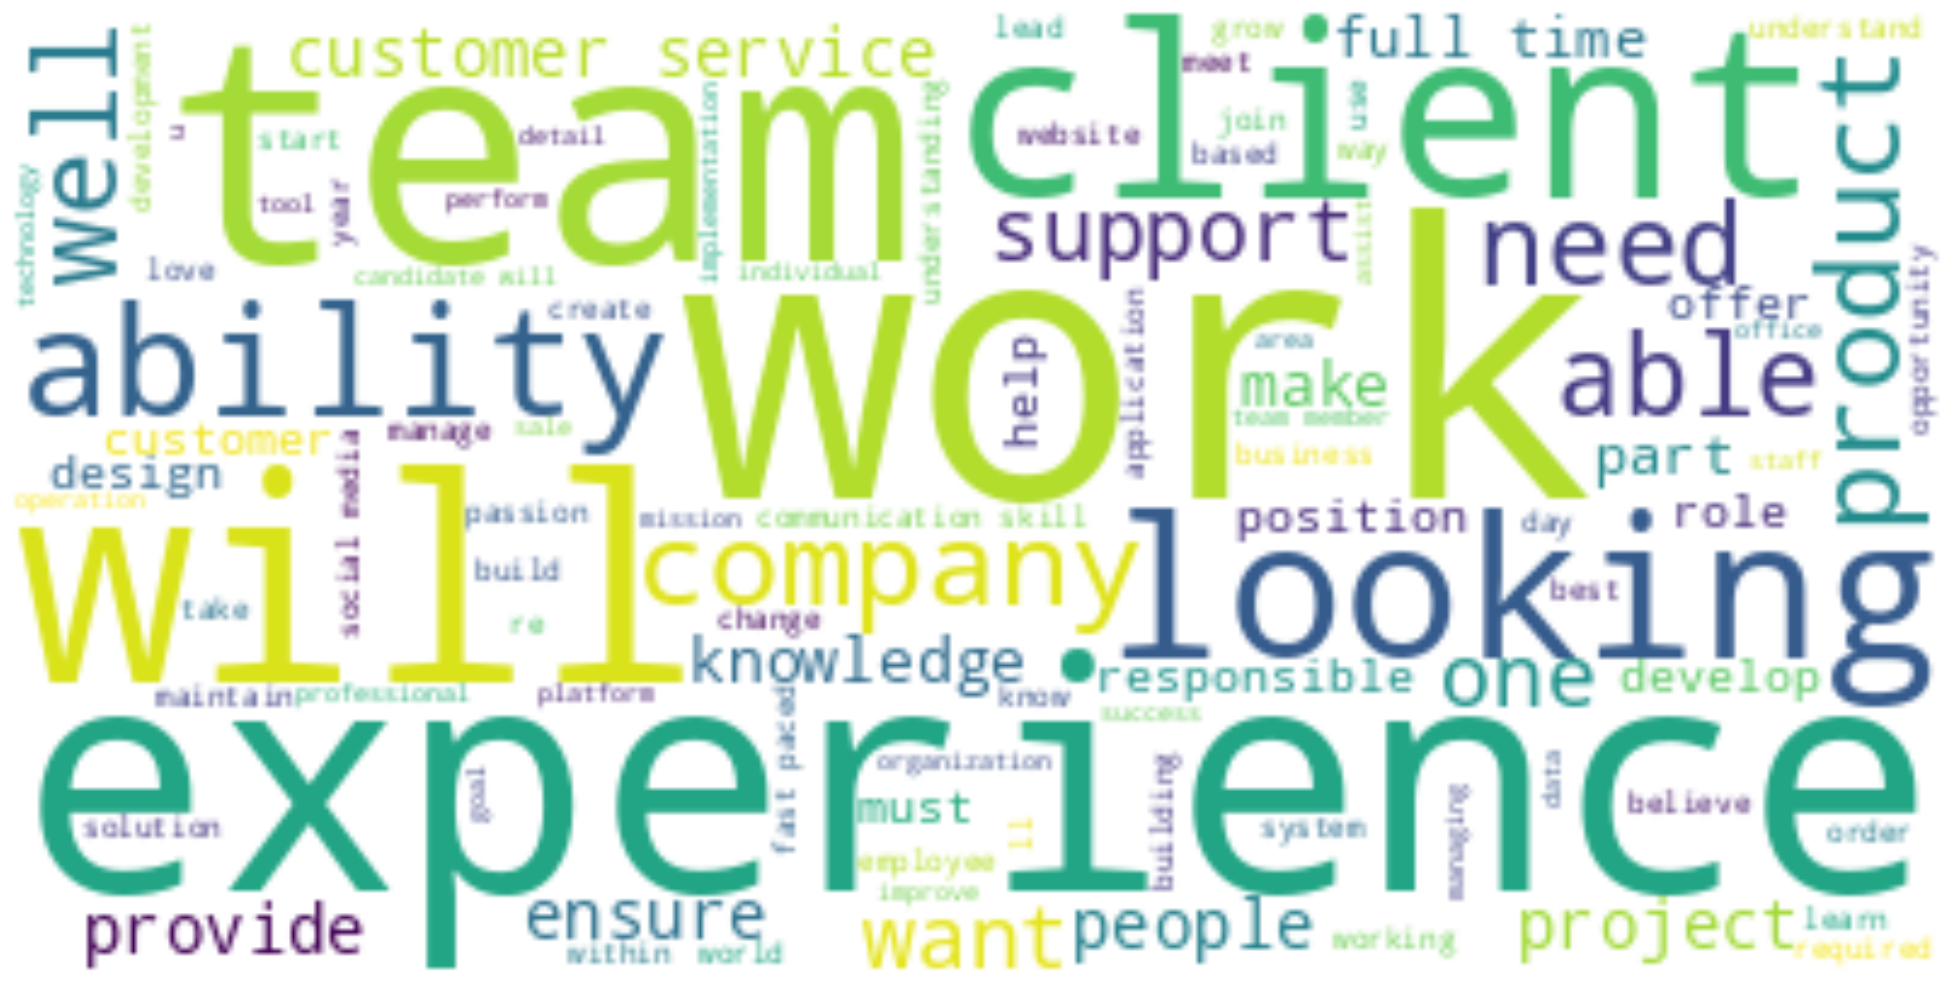

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wcf = WordCloud(background_color = 'white',max_words = 2000,stopwords = stopwords )
wcf.generate(" ".join(df['description']))
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(20)
plt.imshow(wcf,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.fraudulent.value_counts()

,count
fraudulent,
0,17014
1,866


In [ ]:
df.columns


Index(['job_id', 'description', 'fraudulent'], dtype='object')

In [ ]:
X=df.description.astype('str')
y=df.fraudulent

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab = 3000
tokenizer = Tokenizer(num_words=vocab, oov_token="<oov>") # Use num_words instead of vocab
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(train_sequence, maxlen=1500)
padded_test = pad_sequences(test_sequence, maxlen=1500)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

# Define vocab_size here or make sure it's accessible in this scope
vocab_size = 3000

model=Sequential()
# Use vocab_size in the Embedding layer
model.add(Embedding(vocab_size, 3000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Change 'lr' to 'learning_rate' in the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# List files in the current directory
print("Files in current directory:", os.listdir(current_directory))

# Assuming the file is in the 'input' directory relative to your notebook
# Update the file path if it's located somewhere else
file_path = os.path.join(current_directory, 'fake_job_postings.csv')
#or file_path = '/fake_job_postings.csv'

# Load the dataframe
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # Print suggestions or handle the error appropriately
    # For example, you can exit the script or provide an alternative file path
    # Replace the following line with your desired error handling
    # raise  # This will re-raise the FileNotFoundError

Current working directory: /content
Files in current directory: ['.config', 'sample_data']
Error: File not found at /content/fake_job_postings.csv


In [ ]:
import matplotlib.pyplot as plt
# Train the model and store the training history
history = model.fit(padded_train, y_train, epochs=5, validation_data=(padded_test, y_test)) # Adjust epochs as needed

# Now you can plot the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - accuracy: 0.9521 - loss: 0.1565 - val_accuracy: 0.9704 - val_loss: 0.1729
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.9545 - loss: 0.1463 - val_accuracy: 0.9600 - val_loss: 0.1303
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.9574 - loss: 0.1257 - val_accuracy: 0.9603 - val_loss: 0.1603
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.9615 - loss: 0.1203 - val_accuracy: 0.9701 - val_loss: 0.0784
Epoch 5/5
 94/447 ━━━━━━━━━━━━━━━━━━━━ 9:37 2s/step - accuracy: 0.9643 - loss: 0.1185